In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fdae002e8b0>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  n_jobs=2, passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9869506788308163

In [9]:
stacking_regressor2 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb, n_jobs=1,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [10]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fdae002e8b0>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  n_jobs=1, passthrough=True)

In [11]:
stacking_regressor2.score(X,y)

0.9869506788308163

In [12]:
stacking_regressor3 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [13]:
stacking_regressor3.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fdae002e8b0>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  passthrough=True)

In [14]:
stacking_regressor3.score(X,y)

0.9869506788308163

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [15]:
stacking_regressor4 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb,
                                        cv=5,
                                        passthrough=True)

In [16]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fdae002e8b0>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  passthrough=True)

In [17]:
stacking_regressor4.score(X,y)

0.9807146336273574

In [18]:
stacking_regressor5 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb,
                                        cv=5,
                                        passthrough=True)

In [19]:
stacking_regressor5.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fdae002e8b0>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  passthrough=True)

In [20]:
stacking_regressor5.score(X,y)

0.9807146336273574

In [21]:
stacking_regressor6 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb, passthrough=True)

In [22]:
stacking_regressor6.fit(X,y)

StackingRegressor(estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fdae002e8b0>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  passthrough=True)

In [23]:
stacking_regressor6.score(X,y)

0.9807146336273574

### scores1, scores2, scores3 --> produce same results (same StackingRegressor + same cv)

### scores4, scores5, scores5 --> produce same results (same StackingRegressor w/default cv for train, same cv for test)

In [24]:
scores1 = cross_validate(stacking_regressor1, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [25]:
scores1

{'fit_time': array([8.11921716, 7.86879897, 7.86177802, 7.84255481, 7.93036485]),
 'score_time': array([0.00438285, 0.00435901, 0.00463605, 0.00436115, 0.00457907]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb2bd70d60>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb086ffa90>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                     

In [26]:
scores2 = cross_validate(stacking_regressor2, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [27]:
scores2

{'fit_time': array([10.86578298, 10.07613921, 10.96117091, 10.02699184, 10.11586881]),
 'score_time': array([0.00425291, 0.00410509, 0.00419092, 0.00431108, 0.00431395]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb086f2b50>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb18cb02e0>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                

In [28]:
scores3 = cross_validate(stacking_regressor3, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [29]:
scores3

{'fit_time': array([10.08124804, 10.06516099, 10.78535509, 10.56157398, 10.12284589]),
 'score_time': array([0.00422502, 0.00453186, 0.00427008, 0.00423121, 0.00437093]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb18cc64f0>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb088d2520>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <ca

In [30]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [31]:
scores4

{'fit_time': array([10.05819011, 10.10206699, 10.07813692, 10.56585288, 10.27859402]),
 'score_time': array([0.00429702, 0.00437188, 0.004107  , 0.00405407, 0.00428486]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb088fe220>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb0888c2e0>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb2be4c1c0>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    p

In [32]:
scores5 = cross_validate(stacking_regressor5, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [33]:
scores5

{'fit_time': array([10.44744706, 10.11609125, 10.7596364 , 10.916888  , 10.50700283]),
 'score_time': array([0.00432205, 0.00409865, 0.00462008, 0.004354  , 0.00436592]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb2be52850>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdaf81cd1c0>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb088e7fd0>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    p

In [34]:
scores6 = cross_validate(stacking_regressor6, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [35]:
scores6

{'fit_time': array([10.37689805, 10.48776102, 10.123528  , 10.00725889, 11.10789394]),
 'score_time': array([0.00427985, 0.004251  , 0.00427485, 0.00419116, 0.00406289]),
 'estimator': [StackingRegressor(estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb18862f70>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdaf81cde20>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fdb2bd70310>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(estimators=[('CB',
                     

In [36]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [37]:
cat = evaluate_model(cb, X, y)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [38]:
cat

,fit_time,score_time,test_score
0,6.095738,0.010024,0.920566
1,12.579137,0.008782,0.899820
2,6.395556,0.011740,0.938045
3,6.052220,0.011689,0.933383
4,6.412742,0.009334,0.949361
5,6.271515,0.009675,0.934502
6,6.327885,0.010919,0.944618
7,6.549376,0.007103,0.924652
8,6.362075,0.007215,0.947610
9,6.290152,0.007724,0.883656


In [39]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [40]:
cat

,cat_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [41]:
g = evaluate_model(gb, X, y)

In [42]:
g

,fit_time,score_time,test_score
0,1.130671,0.004525,0.914384
1,1.126482,0.007006,0.831491
2,1.085561,0.002354,0.917112
3,1.164490,0.002421,0.910775
4,1.081750,0.005285,0.928567
5,1.087264,0.002419,0.909586
6,1.081505,0.005536,0.926628
7,1.090628,0.002425,0.895272
8,1.024505,0.003176,0.928754
9,1.013008,0.002580,0.836306


In [43]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [44]:
g

,gb_score
0,0.914384
1,0.831491
2,0.917112
3,0.910775
4,0.928567
5,0.909586
6,0.926628
7,0.895272
8,0.928754
9,0.836306


In [45]:
df1 = evaluate_model(stacking_regressor1, X, y)

In [46]:
df1

,fit_time,score_time,test_score
0,35.380177,0.006965,0.909058
1,48.898605,0.011223,0.851171
2,47.844109,0.009947,0.935106
3,49.478341,0.011893,0.911477
4,47.484318,0.008832,0.941782
5,43.524232,0.009893,0.904488
6,33.613523,0.009285,0.941043
7,49.930170,0.010535,0.929214
8,31.461957,0.005728,0.945791
9,32.982102,0.004731,0.855005


In [47]:
df1 = df1[['test_score']].rename(columns={'test_score':'test_score_1'})

In [48]:
df1

,test_score_1
0,0.909058
1,0.851171
2,0.935106
3,0.911477
4,0.941782
5,0.904488
6,0.941043
7,0.929214
8,0.945791
9,0.855005


In [49]:
df2 = evaluate_model(stacking_regressor2, X, y)

In [50]:
df2

,fit_time,score_time,test_score
0,50.729760,0.010262,0.909058
1,39.309670,0.011105,0.851171
2,47.131595,0.009141,0.935106
3,34.764004,0.006924,0.911477
4,40.847994,0.014257,0.941782
5,37.764006,0.004848,0.904488
6,46.575898,0.007899,0.941043
7,46.304356,0.009605,0.929214
8,38.939423,0.005100,0.945791
9,35.133618,0.005282,0.855005


In [51]:
df2 = df2[['test_score']].rename(columns={'test_score':'test_score_2'})

In [52]:
df2

,test_score_2
0,0.909058
1,0.851171
2,0.935106
3,0.911477
4,0.941782
5,0.904488
6,0.941043
7,0.929214
8,0.945791
9,0.855005


In [53]:
df3 = evaluate_model(stacking_regressor3, X, y)

In [54]:
df3

,fit_time,score_time,test_score
0,42.100682,0.016659,0.909058
1,37.354479,0.010151,0.851171
2,37.466842,0.010994,0.935106
3,44.350023,0.012316,0.911477
4,41.978939,0.009616,0.941782
5,37.685207,0.004790,0.904488
6,37.641480,0.010519,0.941043
7,43.647884,0.023902,0.929214
8,39.895232,0.004234,0.945791
9,33.665222,0.010181,0.855005


In [55]:
df3 = df3[['test_score']].rename(columns={'test_score':'test_score_3'})

In [56]:
df3

,test_score_3
0,0.909058
1,0.851171
2,0.935106
3,0.911477
4,0.941782
5,0.904488
6,0.941043
7,0.929214
8,0.945791
9,0.855005


In [57]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [58]:
df4

,fit_time,score_time,test_score
0,29.660091,0.011466,0.912790
1,49.294929,0.024888,0.831738
2,38.714433,0.026924,0.938496
3,59.778243,0.028512,0.915789
4,49.337218,0.036667,0.936755
5,39.926011,0.009210,0.915035
6,39.875484,0.006195,0.941566
7,59.094592,0.006280,0.915564
8,27.787730,0.008659,0.944074
9,40.064817,0.005323,0.872299


In [59]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [60]:
df4

,test_score_4
0,0.912790
1,0.831738
2,0.938496
3,0.915789
4,0.936755
5,0.915035
6,0.941566
7,0.915564
8,0.944074
9,0.872299


In [61]:
df5 = evaluate_model(stacking_regressor5, X, y)

In [62]:
df5

,fit_time,score_time,test_score
0,42.637214,0.011835,0.912790
1,34.978537,0.009216,0.831738
2,52.233355,0.017608,0.938496
3,42.123429,0.008648,0.915789
4,48.573766,0.022974,0.936755
5,42.606189,0.013954,0.915035
6,35.329848,0.007703,0.941566
7,37.715039,0.027412,0.915564
8,36.111103,0.004971,0.944074
9,39.137103,0.005601,0.872299


In [63]:
df5 = df5[['test_score']].rename(columns={'test_score':'test_score_5'})

In [64]:
df5

,test_score_5
0,0.912790
1,0.831738
2,0.938496
3,0.915789
4,0.936755
5,0.915035
6,0.941566
7,0.915564
8,0.944074
9,0.872299


In [65]:
df6 = evaluate_model(stacking_regressor6, X, y)

In [66]:
df6

,fit_time,score_time,test_score
0,36.874138,0.011417,0.912790
1,52.040538,0.008901,0.831738
2,37.198446,0.010751,0.938496
3,49.679913,0.006789,0.915789
4,42.944019,0.010921,0.936755
5,36.702102,0.010553,0.915035
6,30.059890,0.010081,0.941566
7,41.831074,0.009096,0.915564
8,42.890382,0.007326,0.944074
9,28.238763,0.004712,0.872299


In [67]:
df6 = df6[['test_score']].rename(columns={'test_score':'test_score_6'})

In [68]:
df6

,test_score_6
0,0.912790
1,0.831738
2,0.938496
3,0.915789
4,0.936755
5,0.915035
6,0.941566
7,0.915564
8,0.944074
9,0.872299


In [69]:
combo = pd.concat([cat, g, df1, df2, df3, df4, df5, df6], axis=1)

In [70]:
combo

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
0,0.920566,0.914384,0.909058,0.909058,0.909058,0.912790,0.912790,0.912790
1,0.899820,0.831491,0.851171,0.851171,0.851171,0.831738,0.831738,0.831738
2,0.938045,0.917112,0.935106,0.935106,0.935106,0.938496,0.938496,0.938496
3,0.933383,0.910775,0.911477,0.911477,0.911477,0.915789,0.915789,0.915789
4,0.949361,0.928567,0.941782,0.941782,0.941782,0.936755,0.936755,0.936755
5,0.934502,0.909586,0.904488,0.904488,0.904488,0.915035,0.915035,0.915035
6,0.944618,0.926628,0.941043,0.941043,0.941043,0.941566,0.941566,0.941566
7,0.924652,0.895272,0.929214,0.929214,0.929214,0.915564,0.915564,0.915564
8,0.947610,0.928754,0.945791,0.945791,0.945791,0.944074,0.944074,0.944074
9,0.883656,0.836306,0.855005,0.855005,0.855005,0.872299,0.872299,0.872299


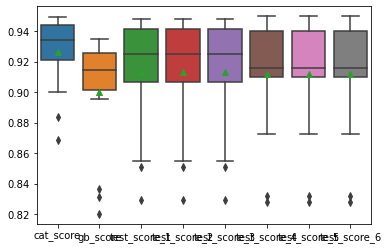

In [71]:
sns.boxplot(data=combo, showmeans=True);

In [72]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926385,0.900217,0.913048,0.913048,0.913048,0.911810,0.911810,0.911810
std,0.024378,0.038179,0.038076,0.038076,0.038076,0.038781,0.038781,0.038781
min,0.868666,0.820084,0.829254,0.829254,0.829254,0.828064,0.828064,0.828064
25%,0.921228,0.901359,0.906773,0.906773,0.906773,0.909735,0.909735,0.909735
50%,0.934502,0.914384,0.924713,0.924713,0.924713,0.915789,0.915789,0.915789
75%,0.943737,0.925660,0.941412,0.941412,0.941412,0.940031,0.940031,0.940031
max,0.949361,0.935113,0.947980,0.947980,0.947980,0.949699,0.949699,0.949699
